# TRAINING THE NETWORK

Let us train the Multi-layer perceptron on real-world data: The MNIST dataset is a very widely used base of
handwritten digits images to benchmark machine learning models and image processing systems. The purpose here
is not to fine-tune the model to achieve a certain degree of performance but simply to make sure it works as expected.

In [1]:
from NeuralNetwork.network import MultiLayerPerceptron
from NeuralNetwork.optimizer import *

In [2]:
mlp = MultiLayerPerceptron([Layer(64), Layer(64, 'relu'), Layer(10, 'softmax')])
optimizer = SGD(learning_rate=0.001)
mlp.he_init()

___
## LOADING THE DATA

Let us use a simplified sample of the actual MNIST database. It consists of 1797 instances picked among the 70K ones
from the original dataset, dimensionality is reduced to 8x8 (instead of 28x28) which makes a total of 64 inputs. We use Scikit-Learn to load the data and split it into training and testing sets.

In [4]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

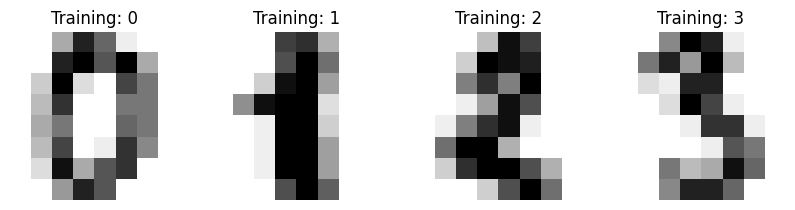

In [5]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

Example of digits from the training set.

In [6]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

Remember the labels must be one-hot encoded for the comparison with model's predictions to be accurate otherwise it won't simply learn anything (original labels are scalar values and must be converted).

In [7]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer()

y_train_one_hot = label_binarizer.fit_transform(y_train)
y_test_one_hot = label_binarizer.transform(y_test)

In [8]:
epochs = 50
for i in range(epochs):
    loss = 0.0
    for X, y in zip(X_train, y_train_one_hot):
        mlp.forward(X)
        loss += cross_entropy(mlp.layers[-1].get_output(), y)
        grads_w, grads_b = mlp.backward(y)
        optimizer.step(mlp.layers, grads_w, grads_b)
    loss /= len(X_train)
    print('Epoch ', i, ' - Average loss = ', loss)

Epoch  0  - Average loss =  2.3655527998813755
Epoch  1  - Average loss =  0.5079542081925157
Epoch  2  - Average loss =  0.2940916090485239
Epoch  3  - Average loss =  0.21402918093642906
Epoch  4  - Average loss =  0.16211463166473206
Epoch  5  - Average loss =  0.1341451256610878
Epoch  6  - Average loss =  0.11531639319618275
Epoch  7  - Average loss =  0.1029561327798804
Epoch  8  - Average loss =  0.0921416855655675
Epoch  9  - Average loss =  0.08257501911354298
Epoch  10  - Average loss =  0.07395815584090425
Epoch  11  - Average loss =  0.06648426203087296
Epoch  12  - Average loss =  0.05999547728365263
Epoch  13  - Average loss =  0.05450304690923461
Epoch  14  - Average loss =  0.04994680131706209
Epoch  15  - Average loss =  0.04624498931222353
Epoch  16  - Average loss =  0.04312246028619276
Epoch  17  - Average loss =  0.040634771871104834
Epoch  18  - Average loss =  0.03838841675822965
Epoch  19  - Average loss =  0.035951540618571566
Epoch  20  - Average loss =  0.033

In [9]:
n = 0
mlp.forward(X_test[n])
np.set_printoptions(precision=3, suppress=True)
print('Prediction: ', softmax(mlp.layers[-1].get_output()))
print('True Label: ', y_test_one_hot[n])

Prediction:  [0.    0.    0.    0.    0.    0.005 0.    0.001 0.991 0.003]
True Label:  [0 0 0 0 0 0 0 0 1 0]
